In [22]:
"""
Histogram demo from
http://docs.astropy.org/en/stable/visualization/histogram.html

This file uses similarity_analysis.csv which can be generated using `planSimilarity.py`
"""
import os
import numpy as np
import matplotlib
# matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

def generateGraph(featureIndex, featureLable):
    plotData = processData(featureIndex)
    drawGraph(plotData, featureLable)


# feature index of similarity_analysis.csv i.e which measure to plot (entropy, euclidean, hamming, etc) 
def processData(featureIndex):
    plotData = [[],[],[]]
    featureIndex
    if(os.path.exists('similarity_analysis.csv')):
        with open('similarity_analysis.csv', 'r') as summary:
            for line in summary:
                elements = line.split(',')
                if len(elements) > 5:
                    colData = elements[featureIndex]
                    if colData.strip() != 'nan': 
                        if(elements[1].strip() == 's1-s2'):
                            plotData[0].append(float(colData))
                        elif(elements[1].strip() == 's1-s3'):
                            plotData[1].append(float(colData))
                        elif(elements[1].strip() == 's2-s3'):
                            plotData[2].append(float(colData))
    return plotData

def drawGraph(plotData, graphLable):
    #np.random.seed(0)
    n_bins = 10
    #x = np.random.randn(1000, 3) 
    x =  np.array(plotData).transpose()

    #fig, axes = plt.subplots(nrows=2, ncols=2)
    #ax0, ax1, ax2, ax3 = axes.flatten()
    #ax3 = axes.flatten()
    fig, axes = plt.subplots(nrows=1, ncols=1)
    ax0 = axes

    #colors = ['#44000d', '#83142c', '#ad1d45']
    colors = ['#00a898', '#5ebf8c', '#b6d887' ]
    labels = ['plan1-plan2', 'plan1-plan3', 'plan2-plan3']
    ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=labels)
    ax0.legend(prop={'size': 10})
    ax0.set_title(graphLable)

    fig.tight_layout()
    plt.show()

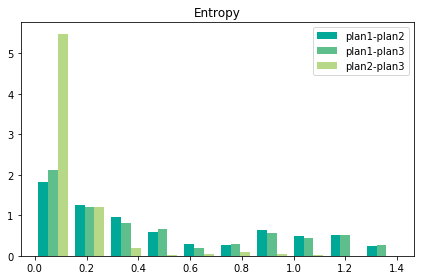

In [23]:
generateGraph(2, "Entropy")

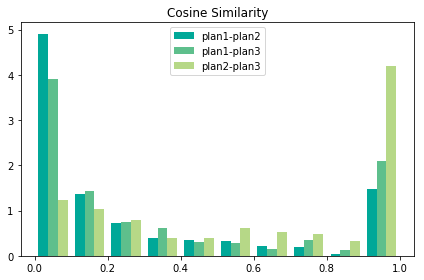

In [24]:
generateGraph(3, "Cosine Similarity")

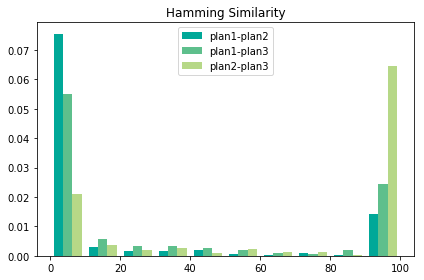

In [25]:
generateGraph(4, 'Hamming Similarity')

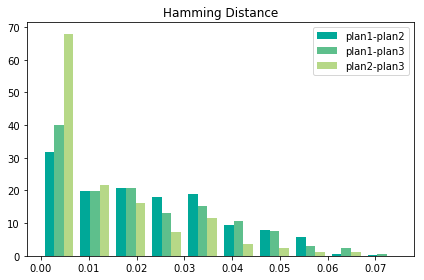

In [26]:
generateGraph(5, 'Hamming Distance')

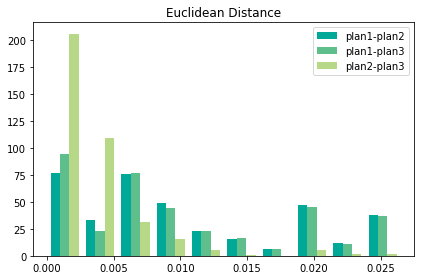

In [27]:
generateGraph(6, 'Euclidean Distance')

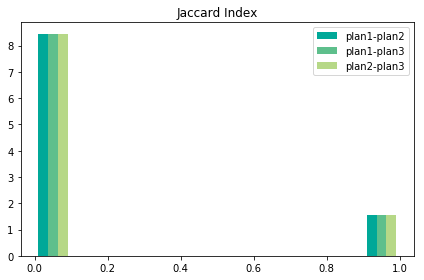

In [28]:
generateGraph(7, 'Jaccard Index')

In [ ]:
######################################
####### GENERAL CONFIGURATION ########

# The total number of cars we use in our simulation
totalCarCounter = 300

# How long the simulation will run
# simulation_horizon = 300
simulation_horizon = 1000

######################################
##### CONFIGURATION OF PLANNING ######
######################################

# whether the simulation should start with an EPOS invocation
start_with_epos_optimization = False

# How frequently EPOS planning will be invoked (runtime-configurable parameter)
# planning_period = 100
# planning_period = 600
planning_period = 200

# the number of steps to look in the future while planning
# planning_steps = 2
planning_steps = 2

# how long a planning step should be
planning_step_horizon = 300

# double from [0, 1], unfairness
alpha = 1

# double from [0, 1], selfishness or local objective
beta = 0
# unfairness + selfishness <= 1
# alpha*unfairness + beta*local_cost + (1-alpha-beta)*global_costs

# Suggested values : "XCORR", VAR", "RSS", "RMSE"
globalCostFunction="VAR"

######################################
#### CONFIGURATION OF ADAPTATION #####
######################################

# how often adaptation should be triggered
# adaptation_period = 100
# adaptation_period = 600
adaptation_period = 200

# the actual adaptation logic. Possible values: "load_balancing", "avoid_overloaded_streets", "tune_planning_resolution"
#adaptation_strategy = "load_balancing"
adaptation_strategy = "avoid_overloaded_streets"


######################################
##### CONFIGURATION OF ACCIDENT ######
######################################

restrictTrafficFlow = True              # if true then traffic will flow from source to target nodes as defined below
trafficSource = (4025, 532, 80)         # region where traffic will generate or start from. Tuple: (x-position, y-position, radius) on the map
trafficTarget = (568, 2659, 80)         # Target of the traffic. Tuple: (x-position, y-position, radius) on the map
triggerAccident = True                  # Trigger accident scenario or not. Below parameters will be considered if this value is True
accidentFrom = 200                      # simulation tick where accident will happen. Block the road in this case for example
accidentTill = 500                      # simulation tick when the accident is cleared. Unblock the road in this case for example
blockLanes = ["-2788#0_0", "-2788#0_1"] # list of lane ids to block when accident happen
blockEdges = ["-2788#0"]
blockedLaneSpeed = 0.5